# Chapter 1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(X, y)
knn.predict(X_new)

In [ ]:
# Measuring model performance
# Using Iris dataset rather than what's used in the videos
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

In [ ]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

In [ ]:
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


In [ ]:
train_accuracies

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying number of neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

# Chapter 2
We pull the diabetes data from Kaggle

## Introduction to Regression

In [ ]:

import pandas as pd
diabetes_df = pd.read_csv(
    "https://www.kaggle.com/api/v1/datasets/download/saurabh00007/diabetescsv", compression="zip"
).rename(
    columns = lambda col: col.lower()
)
# Filter out small values of bmi
diabetes_df= diabetes_df[
    (diabetes_df.bmi > 1e-6) & (diabetes_df.glucose > 1e-6) # To better replicate the DataCamp data set
]
# diabetes_df = pd.read_csv("https://hbiostat.org/data/repo/diabetes.csv")
print(diabetes_df.head())

In [ ]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df.glucose.values
print(type(X), type(y))

In [ ]:
# The shapes are different than in the tutorial
X_bmi = X[:, 4] # Terrible way to do this by the way
print(y.shape, X_bmi.shape)

In [ ]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color="red")
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

## The Basics of Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [ ]:
reg_all.score(X_test, y_test)

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error
print(mean_squared_error(y_test, y_pred)) # looks like squared=False is no longer supported
print(root_mean_squared_error(y_test, y_pred)) # looks like squared=False is no longer supported

## Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [ ]:
print(cv_results)

In [ ]:
print(np.mean(cv_results), np.std(cv_results))

In [ ]:
print(np.quantile(cv_results, [0.025, 0.975]))

## Regularized Regression
Lasso can select important features of a dataset

In [ ]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test) # NOTE: Not used
    score = ridge.score(X_test, y_test)
    scores.append(score)
print(scores)

In [ ]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Ridge(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    score = lasso.score(X_test, y_test)
    scores.append(score)
    
print(scores)

In [ ]:
from sklearn.linear_model import Lasso
# NOTE: Note the column name change here, mainly to make bar chart rendering a bit better
X = diabetes_df.rename(columns={"diabetespedigreefunction": "dpf"}).drop("glucose", axis=1).values
y = diabetes_df.glucose.values
names = diabetes_df.rename(columns={"diabetespedigreefunction": "dpf"}).drop("glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()


# Chapter 3: Fine-Tuning Your Model

## How good is your model?

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Measuring model performance
# Using Iris dataset rather than what's used in the videos
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
iris.target.value_counts()

## Logistic Regression and the ROC Curve

In [ ]:
# Measuring model performance
# Using breast cancer dataset for binary classification
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer(as_frame=True)
X = dataset.data
y = dataset.target

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LogisticRegression(max_iter=3000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)

In [ ]:
y_pred_probs = reg.predict_proba(X_test)[:, 1]
print(y_pred_probs[0:5])

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

In [ ]:
# Manually checking fpr and tpr
threshold = thresholds[5]
print(fpr[5], tpr[5])
# vals, cts = np.unique(y_test[y_pred_probs >= threshold], return_counts=True) # WRONG
vals, cts = np.unique((y_pred_probs >= threshold).astype(int)[y_test == 1], return_counts=True)
print("Estimate of TPR: ", cts[1]/(cts[1] + cts[0])) 
vals, cts = np.unique((y_pred_probs >= threshold).astype(int)[y_test == 0], return_counts=True) # WRONG
print("Estimate of FPR: ", cts[1]/(cts[1] + cts[0])) 

In [ ]:
print(confusion_matrix(y_test, (y_pred_probs >= thresholds[5]).astype(int)))

## Hyperparameter Tuning

In [ ]:
# Reading the diabetes dataset back in
import pandas as pd
diabetes_df = pd.read_csv(
    "https://www.kaggle.com/api/v1/datasets/download/saurabh00007/diabetescsv", compression="zip"
).rename(
    columns = lambda col: col.lower()
)
# Filter out small values of bmi
diabetes_df= diabetes_df[
    (diabetes_df.bmi > 1e-6) & (diabetes_df.glucose > 1e-6) # To better replicate the DataCamp data set
]
print(diabetes_df.head())

X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df.glucose.values
print(type(X), type(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold # , cross_val_score
from sklearn.linear_model import Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}
reg = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import Ridge
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}
reg = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

In [ ]:
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

# Chapter 4: Preprocessing and Pipelines

## Preprocessing data

In [46]:
import pandas as pd
music_df = pd.read_csv(
    # 'https://www.kaggle.com/api/v1/datasets/download/shantanuchaubey/musiccsv',
    'https://www.kaggle.com/api/v1/datasets/download/saurabhshahane/music-dataset-1950-to-2019', 
    # 'https://www.kaggle.com/api/v1/datasets/download/akiboy96/spotify-hit-predictor-merged-with-genre',
    compression='zip'
)
music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
print(music_dummies.head())

   country  hip hop   jazz   pop  reggae   rock
0    False    False  False  True   False  False
1    False    False  False  True   False  False
2    False    False  False  True   False  False
3    False    False  False  True   False  False
4    False    False  False  True   False  False


In [47]:
music_df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [48]:
music_dummies2 = pd.concat([music_df, music_dummies], axis=1)
music_dummies2 = music_dummies2.drop("genre", axis=1)

In [33]:
# # Encoding dummy variables
# music_dummies = pd.get_dummies(music_df, drop_first=True)
# print(music_dummies.columns)

In [55]:
# Linear regression with dummy variables
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# I couldn't find the data set online, so making some adjustments
data = pd.concat([music_df[["release_date", "loudness"]], music_dummies], axis=1)
# music_dummies = music_dummies.drop("genre", axis=1)
response_variable = "loudness" # "popularity" 

In [56]:
data

,release_date,loudness,country,hip hop,jazz,pop,reggae,rock
0,1950,0.454119,False,False,False,True,False,False
1,1950,0.647540,False,False,False,True,False,False
2,1950,0.585288,False,False,False,True,False,False
3,1950,0.744404,False,False,False,True,False,False
4,1950,0.646489,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
28367,2019,0.759711,False,True,False,False,False,False
28368,2019,0.789580,False,True,False,False,False,False
28369,2019,0.726970,False,True,False,False,False,False
28370,2019,0.786888,False,True,False,False,False,False


In [57]:
X = data.drop(response_variable, axis=1).values
y = data[response_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [58]:
linreg= LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

In [59]:
print(np.sqrt(-linreg_cv))

[0.09154653 0.09172207 0.0916814  0.09230133 0.09091522]


## Handling missing data
This section is not run as we don't have the actual data set.

In [ ]:
# Dropping missing data
music_df = music_df.dropna(subset=["genre", "popularity", "Loudness", "Liveness", "tempo"])
print(music_df.isna().sum().sort_values())

In [ ]:
# Imputation with scikit-learn
from sklearn.impute import SimpleImputer
X_cat music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre", "popularity"], axis=1).values
y=music_df["popularity"].values

X_train_cat, X_test_cat, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.2, random_state=12
)
X_train_num, X_test_num, y_train, y_test train_test_split(
    X_num, y, test_size=0.2, random_state=12
)

imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.fit_transform(X_test_num)
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)


In [ ]:
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre", "popularity", "Loudness", "Liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

In [ ]:
steps = [("imputation", SimpleImputer()), ("logistic_regresion", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

## Centering and scaling

In [ ]:
# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

In [ ]:
# Scaling in a pipeline
steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=6))
]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

In [ ]:
# Comparing performance using unscaled data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)

knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))

In [ ]:
# CV and scaling in a pipeline
from sklearn.model_selection import GridSearchCV
steps = [
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline (steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21
)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

## Evaluating multiple models

In [4]:
music_df

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0


In [15]:
# Evaluating classification models
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# This time we'll use the actual DataCamp music data set
import pandas as pd
music_df = pd.read_csv(
    "/home/justinian/Code/datascience-miscellaneous/notebooks/python/music_clean.csv"
).drop(
    columns=["Unnamed: 0"]
)
# music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
# music = pd.concat([music_df, music_dummies], axis=1)
# This cleaned data set seems to have a simple form of the genre column, no need to create dummies
music = music_df

X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/run/user/1000/nix-shell.Csk3R4/ipykernel_212849/3809984752.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


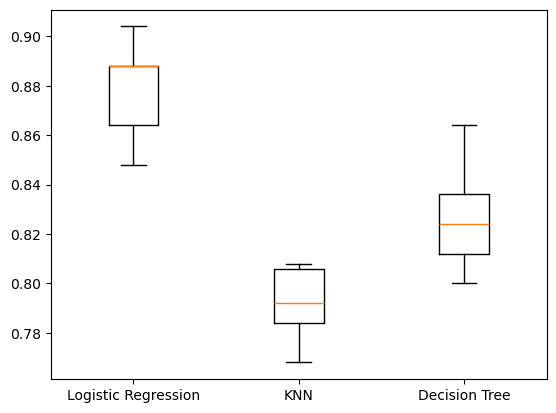

In [18]:
# Evaluating classification models
models = {
    "Logistic Regression": LogisticRegression(), 
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [19]:
# Test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.82
KNN Test Set Accuracy: 0.784
Decision Tree Test Set Accuracy: 0.788


# Experiments

In [62]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kdt = KDTree(X, leaf_size=30, metric='euclidean')
kdt.query(X, k=2, return_distance=False)

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [64]:
kdt.get_arrays()

(array([[-1., -1.],
        [-2., -1.],
        [-3., -2.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  2.]]),
 array([0, 1, 2, 3, 4, 5]),
 array([(0, 6, 1, 3.60555128)],
       dtype=[('idx_start', '<i8'), ('idx_end', '<i8'), ('is_leaf', '<i8'), ('radius', '<f8')]),
 array([[[-3., -2.]],
 
        [[ 3.,  2.]]]))